Anomalieerkennung in Finanzmarktdaten

In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
import seaborn as sns
import Builder

%matplotlib inline

In [2]:
sns.set_style('whitegrid')
sns.set_context('notebook',font_scale=1)

In [3]:
data = Builder.buildMertonDF()

In [4]:
data

,Merton Jump,Jumps plot,Jumps,Return log,RV,BPV,Diff,Anomaly Returns IF,Anomaly RV IF,Anomaly Diff IF
1,1.000971e+00,0.0,1,0.002790,7.784112e-06,0.000010,-0.000002,1,1,1
2,9.986861e-01,0.0,1,-0.002285,5.220241e-06,0.000003,0.000002,1,1,1
3,9.996318e-01,0.0,1,0.000946,8.958264e-07,0.000006,-0.000005,1,1,1
4,9.955911e-01,0.0,1,-0.004050,1.640563e-05,0.000020,-0.000004,1,1,1
5,9.924586e-01,0.0,1,-0.003151,9.930980e-06,0.000364,-0.000354,1,1,1
...,...,...,...,...,...,...,...,...,...,...
9994,2.216612e-08,0.0,1,-0.001948,3.794598e-06,0.000001,0.000003,1,1,1
9995,2.215877e-08,0.0,1,-0.000332,1.100379e-07,0.000004,-0.000004,1,1,1
9996,2.200101e-08,0.0,1,-0.007145,5.104461e-05,0.000006,0.000045,1,1,1
9997,2.201234e-08,0.0,1,0.000515,2.647693e-07,0.000002,-0.000001,1,1,1


In [5]:
pct,subset = Builder.subset(data)

1556 von 1813 Anomalien wurden erkannt -> 86.0 % IF contamin: 1999



Inlier Prediction: +1
Outlier Prediction: -1


In [6]:
subset

,Jumps,Anomaly Diff IF
6,-1,-1
8,1,-1
9,-1,-1
12,-1,-1
20,-1,-1
...,...,...
9965,-1,1
9968,-1,-1
9980,-1,-1
9988,-1,-1


In [7]:
print('data: ',f1_score(data['Jumps'],data['Anomaly Diff IF'], pos_label=-1))
print('IF Returns: ',f1_score(data['Jumps'],data['Anomaly Returns IF'], pos_label=-1))

data:  0.8163693599160545
IF Returns:  0.8848071372343216


In [8]:
# plots

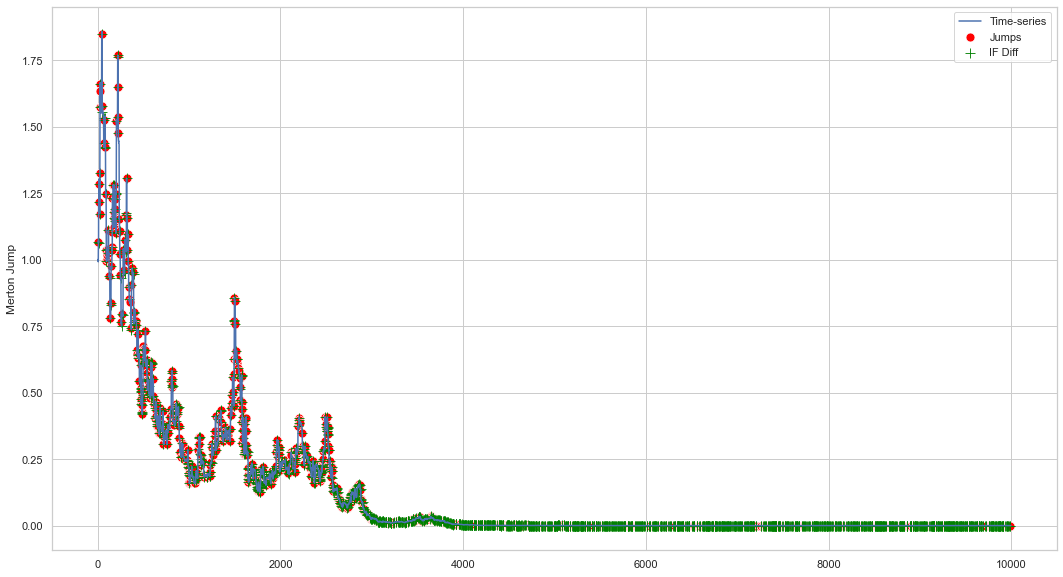

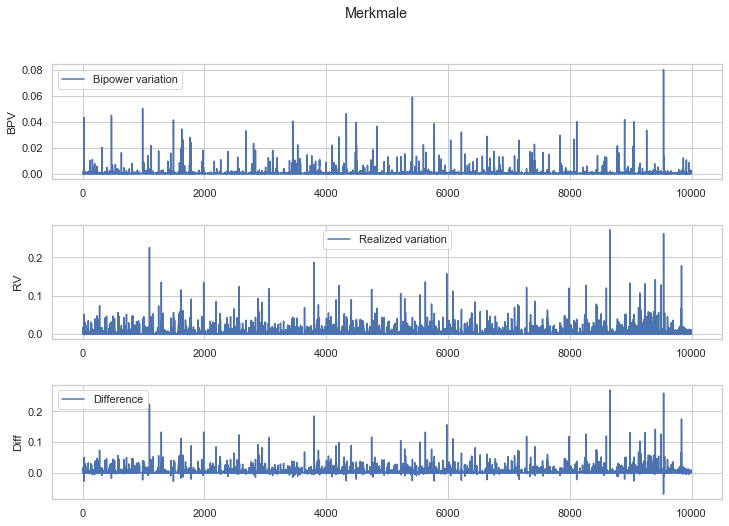

In [9]:
Builder.plotter(data)


Jump rate that is tested in all algorithms where steps used are 10 000.
jumps/steps| 0.0002 |0.001| 0.002| 0.005| 0.01| 0.02

In [10]:
subset = data.loc[(data['Anomaly Diff IF']==-1)]
subset['Merton Jump']

6       1.068191e+00
8       1.064835e+00
9       1.216621e+00
12      1.286769e+00
20      1.174106e+00
            ...     
9960    2.195561e-08
9968    2.137923e-08
9980    2.037029e-08
9988    2.271100e-08
9989    2.234232e-08
Name: Merton Jump, Length: 1999, dtype: float64